In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

import sys
import os
project_dir = os.path.abspath('..')
if project_dir not in sys.path:
    sys.path.append(project_dir)

from src.utils import clean_tree_data


### Here is some tree data!

In [2]:
tree = pd.read_csv('../data/in/Tree_Inventory_20250416.csv')

C:\Users\AllieFeras\AppData\Local\Temp\ipykernel_30396\3571834660.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  tree = pd.read_csv('../data/in/Tree_Inventory_20250416.csv')


In [3]:
tree.describe(include=np.number)

,DBH,Total Yearly Eco Benefits ($),Stormwater Benefits ($),Stormwater Gallons Saved,Greenhouse CO2 Benefits ($),CO2 Avoided (in lbs.),CO2 Sequestered (in lbs.),Energy Benefits ($),kWh Saved,Therms Saved,Air Quality Benefits ($),Pollutants Saved (in lbs.),Property Benefits ($),Leaf Surface Area (in sq. ft.),Address,Site,Latitude,Longitude,Site ID
count,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000,133218.000000
mean,7.277412,58.416490,3.946885,493.358860,0.306661,59.304778,46.625866,26.191867,39.925755,14.629378,2.552849,0.409112,25.418456,42.245198,1244.734878,1.431308,42.908862,-78.846771,66693.009368
std,10.091653,76.913494,7.486037,935.737986,0.646880,118.124046,111.586455,36.323441,58.193432,20.034121,4.921157,0.786852,33.999343,56.506389,28978.640606,4.129126,0.122205,0.218067,38502.805297
min,-10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.911907,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,1.000000,42.890996,-78.871450,33359.250000
50%,2.000000,15.350000,0.240000,30.110000,0.010000,1.170000,0.770000,4.050000,4.430000,2.430000,0.090000,0.010000,8.990000,14.940000,179.000000,1.000000,42.913241,-78.846553,66688.500000
75%,13.000000,103.250000,4.710000,588.570000,0.200000,36.700000,26.580000,48.760000,73.650000,27.470000,2.210000,0.340000,46.970000,78.060000,414.000000,1.000000,42.936058,-78.821594,100002.750000
max,508.000000,469.300000,68.280000,8534.550000,7.600000,941.650000,1844.070000,170.640000,329.780000,88.380000,44.760000,6.370000,241.990000,402.180000,999999.000000,206.000000,42.965551,0.000000,136675.000000


### Let's clean it!

Keeping all the non monetary eco benefits and property values. Are more ecological trees also more beneficial to the owners wallet?

Removed NAs and zeros because I'm assuming all those zeros are just missing data. When we assume we make a you know what out of you and me!

In [4]:
tree = clean_tree_data(tree)

### Correlations - I love a pretty heatmap

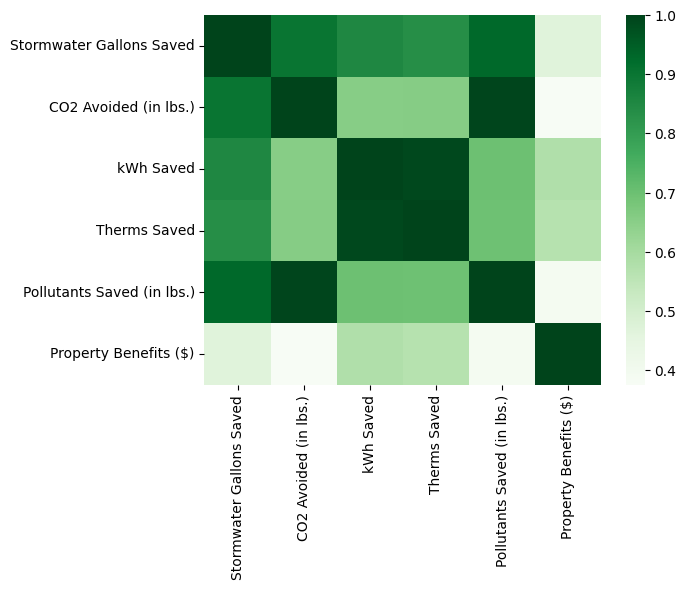

In [5]:
sns.heatmap(tree.corr(),cmap='Greens')
plt.show()

### Cool let's save it

In [6]:
outpath = Path('../data/processed/clean_trees.csv')
outpath.parent.mkdir(exist_ok=True, parents=True)
tree.to_csv(outpath,index=False)